In [162]:
# Load libs

import pandas as pd
from pandas import Series, DataFrame
import numpy as np 

import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


from pandas.io.data import DataReader
from datetime import datetime
from __future__ import division
from __future__ import unicode_literals



In [174]:
# Select style for charts
plt.style.use('ggplot')


In [97]:
# Load data
data = pd.read_excel("TemperaturaDF_Excel.xlsx")

In [99]:
# Explore a bit
data.head()

,id,day,date,max,mean,min,month,year
0,1,1,1973-01-01,26,14,1,1,1973
1,5,2,1973-01-02,25,14,3,1,1973
2,2,3,1973-01-03,25,13,1,1,1973
3,7,4,1973-01-04,21,12,2,1,1973
4,0,5,1973-01-05,26,15,4,1,1973


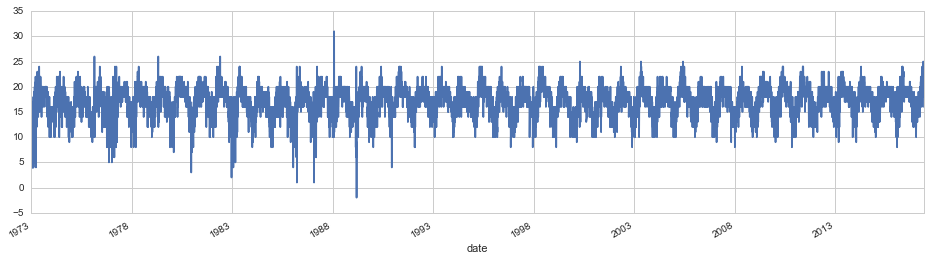

In [100]:
data.plot(x= 'date',y='mean',legend = False, figsize =(16,4))

In [102]:
# Yearly average
y_average = data.groupby(['year'], as_index = False).mean()
y_average.tail()

,year,id,day,max,mean,min,month
40,2013,15066.008219,15.720548,24.353425,17.873973,11.402740,6.526027
41,2014,15438.021918,15.720548,23.410959,17.561644,11.715068,6.526027
42,2015,15810.008219,15.720548,23.547945,17.800000,12.057534,6.526027
43,2016,16181.685792,15.756831,23.633880,17.748634,11.849727,6.513661
44,2017,16445.158940,15.622517,24.867550,17.894040,10.960265,3.013245


In [115]:
# Monthly average by year
y_m_average = data.groupby(['year','month'], as_index = False).mean()
y_m_average.head()

,year,month,id,day,max,mean,min
0,1973,1,15.166667,16.066667,17.833333,10.766667,4.066667
1,1973,2,44.428571,14.500000,19.214286,11.857143,4.500000
2,1973,3,77.241379,16.379310,24.827586,15.517241,7.586207
3,1973,4,107.827586,15.758621,26.586207,19.000000,11.482759
4,1973,5,138.870968,16.000000,26.322581,19.258065,12.258065


In [116]:
# Historic monthly average by year
h_m_average = data.groupby(['month'], as_index = False).mean()
h_m_average.head()

,month,id,day,max,mean,min,year
0,1,8210.009346,15.982746,21.276779,13.696621,6.225018,1995.029475
1,2,8228.242089,14.568829,22.908228,15.141614,7.491297,1994.999209
2,3,8281.620144,16.010072,24.902878,17.122302,9.384173,1995.055396
3,4,8278.610693,15.534639,26.118223,18.998494,11.820030,1994.965361
4,5,8326.718593,15.997128,26.236899,19.732950,12.916726,1995.010050


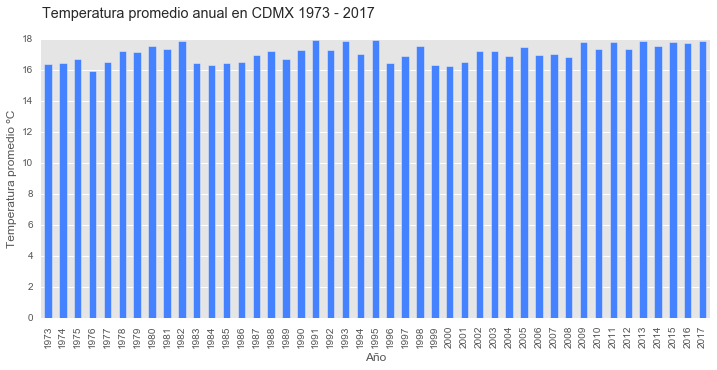

In [189]:
# Chart with average temp by year
y_average.plot('year', 'mean', figsize =(12,5), color = '#4482ff', kind= 'bar', legend = False)
plt.xlabel('Año')
plt.ylabel('Temperatura promedio ºC')
plt.title("Temperatura promedio anual en CDMX 1973 - 2017\n",{'horizontalalignment':'right'})
plt.axes().xaxis.grid()


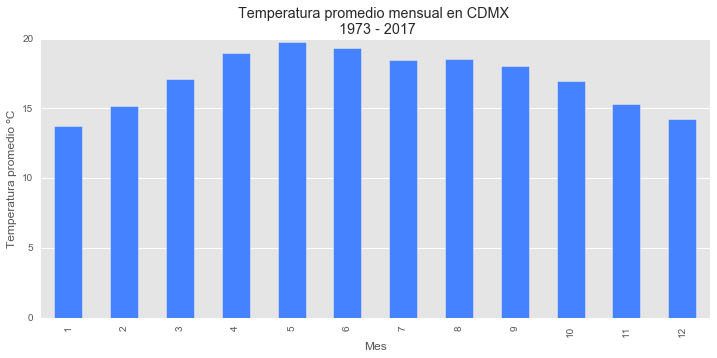

In [177]:
# Chart with average temp by month

h_m_average.plot('month', 'mean', figsize =(12,5), color = '#4482ff', kind= 'bar', legend = False)
plt.xlabel('Mes')
plt.ylabel('Temperatura promedio ºC')
plt.title("Temperatura promedio mensual en CDMX \n 1973 - 2017")
plt.axes().xaxis.grid()


In [145]:
# Year / month data frame for heat map
hmap_dframe = y_m_average[['year','month','mean']]
hmap_dframe = hmap_dframe.pivot('month','year','mean')
hmap_dframe.head()

year,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
month,,,,,,,,,,,,,,,,,,,,,
1,10.766667,15.000000,12.451613,12.741935,12.200000,14.516129,14.258065,13.935484,12.258065,15.096774,...,13.322581,13.967742,13.774194,14.806452,14.193548,14.806452,13.451613,14.258065,14.096774,14.935484
2,11.857143,14.964286,14.857143,14.379310,12.296296,14.250000,15.250000,14.793103,15.464286,15.785714,...,15.586207,15.321429,14.821429,16.464286,15.620690,17.357143,16.892857,15.857143,15.310345,16.357143
3,15.517241,16.193548,18.064516,18.032258,16.366667,16.387097,17.354839,19.225806,17.516129,18.354839,...,17.096774,17.451613,18.032258,17.483871,17.451613,16.258065,18.612903,17.000000,17.419355,17.096774
4,19.000000,18.066667,20.300000,18.066667,15.206897,19.766667,19.000000,18.300000,18.933333,20.266667,...,19.533333,20.433333,19.433333,20.733333,18.400000,20.733333,19.866667,19.833333,20.233333,19.566667
5,19.258065,19.161290,19.193548,18.709677,19.354839,20.129032,18.774194,20.741935,19.935484,20.548387,...,19.741935,19.838710,21.354839,21.870968,20.096774,20.709677,18.677419,19.064516,20.935484,21.419355


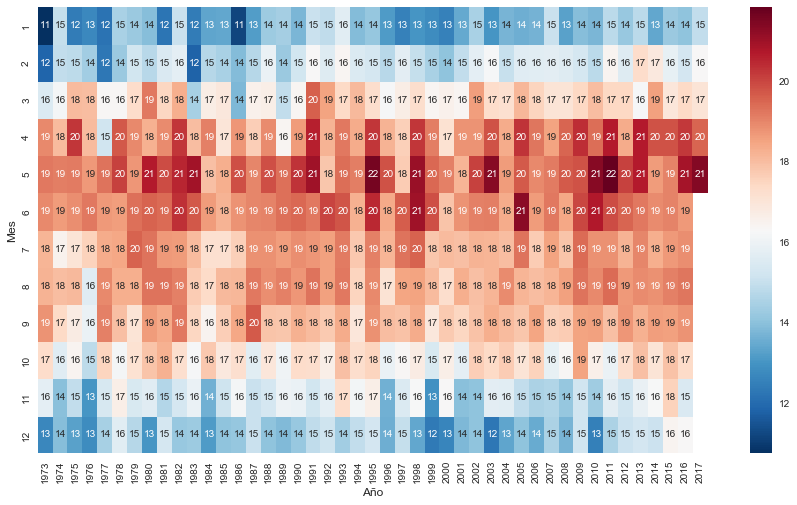

In [195]:
# Heatmap


sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.heatmap(hmap_dframe,annot = True,cmap='RdBu_r')
plt.xlabel('Año')
plt.ylabel('Mes')
plt.savefig("foo.pdf", bbox_inches='tight')

In [185]:
h_m_average

,month,id,day,max,mean,min,year
0,1,8210.009346,15.982746,21.276779,13.696621,6.225018,1995.029475
1,2,8228.242089,14.568829,22.908228,15.141614,7.491297,1994.999209
2,3,8281.620144,16.010072,24.902878,17.122302,9.384173,1995.055396
3,4,8278.610693,15.534639,26.118223,18.998494,11.820030,1994.965361
4,5,8326.718593,15.997128,26.236899,19.732950,12.916726,1995.010050
5,6,8155.090701,15.567073,24.535823,19.301067,13.657012,1994.466463
6,7,8198.990469,16.000000,23.376833,18.432551,13.118768,1994.500000
7,8,8210.836310,15.938244,23.302083,18.505952,13.228423,1994.448661
8,9,8271.525114,15.483257,22.707002,18.059361,13.081431,1994.529680
9,10,8294.593544,16.008070,22.725605,16.940572,10.976522,1994.506970


In [190]:
y_average

,year,id,day,max,mean,min,month
0,1973,187.360111,15.775623,22.811634,16.398892,10.116343,6.567867
1,1974,558.035616,15.720548,23.013699,16.482192,9.983562,6.526027
2,1975,930.008219,15.720548,23.147945,16.706849,10.197260,6.526027
3,1976,1300.602210,15.776243,21.414365,15.939227,10.513812,6.477901
4,1977,1675.357341,15.664820,23.121884,16.565097,10.692521,6.570637
5,1978,2046.008219,15.720548,23.375342,17.268493,11.156164,6.526027
6,1979,2418.024658,15.720548,23.465753,17.205479,10.810959,6.526027
7,1980,2789.669399,15.756831,23.997268,17.560109,11.267760,6.513661
8,1981,3161.626374,15.697802,23.340659,17.387363,11.392857,6.513736
9,1982,3534.016438,15.720548,24.356164,17.860274,11.438356,6.526027
